In [1]:
#Moving Average Convergence/Divergence (MACD) Based Trading Algorithm
#MACD = 12 period EMA - 26 period EMA
#9 Day EMA of MACD -> Signal Line
#Buy when MACD crosses over Signal Line
#Sell when MACD crosses below Signal Line

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [15]:
#Using Tesla stock data for last 5 years
df = pd.read_csv(r'C:\Users\Advait\Downloads\TSLA.csv')

In [16]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

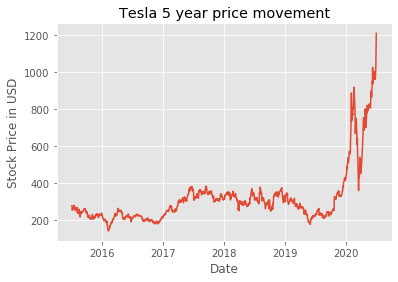

In [17]:
#visualising the stock price
plt.plot(df['Adj Close'], label = 'Adj Close')
plt.title('Tesla 5 year price movement')
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.show()

In [18]:
#Calculating 12 period EMA (Exponential Moving Average)
ema12 = df['Adj Close'].ewm(span=12,adjust=False).mean()
#Calculating 26 period EMA (Exponential Moving Average)
ema26 = df['Adj Close'].ewm(span=26,adjust=False).mean()
#Calculating the MACD line
MACD = ema12 - ema26
#Calculating the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

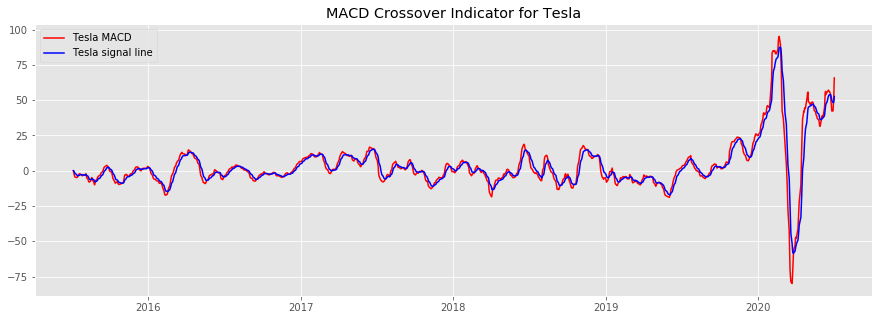

In [19]:
#plotting the MACD graph
plt.figure(figsize=(15,5))
plt.plot(df.index, MACD, label = 'Tesla MACD', color = 'red')
plt.plot(df.index, signal, label = 'Tesla signal line', color = 'blue')
plt.title('MACD Crossover Indicator for Tesla')
plt.legend()
plt.show()

In [20]:
df['MACD'] = MACD
df['sigLine'] = signal

In [21]:
#Defining buy/sell signals
def trade_signal(signal):
    buy = []
    sell = []
    flag = -1
    for i in range(0,len(signal)):
        if(signal['MACD'][i]>signal['sigLine'][i]):
            sell.append(np.nan)
            if(flag!=1):
                buy.append(signal['Adj Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif(signal['MACD'][i]<signal['sigLine'][i]):
            buy.append(np.nan)
            if(flag!=0):
                sell.append(signal['Adj Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy,sell

In [22]:
trades = trade_signal(df)

In [23]:
df['Buy_At'] = trades[0]
df['Sell_At'] = trades[1]

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,sigLine,Buy_At,Sell_At
Date,,,,,,,,,,
2015-07-06,278.880005,281.690002,276.299988,279.720001,279.720001,4121900,0.000000,0.000000,NaN,NaN
2015-07-07,275.000000,275.200012,260.769989,267.880005,267.880005,6105100,-0.944501,-0.188900,NaN,267.880005
2015-07-08,259.320007,260.799988,254.309998,254.960007,254.960007,6221100,-2.704386,-0.691997,NaN,NaN
2015-07-09,259.079987,262.950012,256.790009,257.920013,257.920013,3334100,-3.816269,-1.316852,NaN,NaN
2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900,-4.545793,-1.962640,NaN,NaN


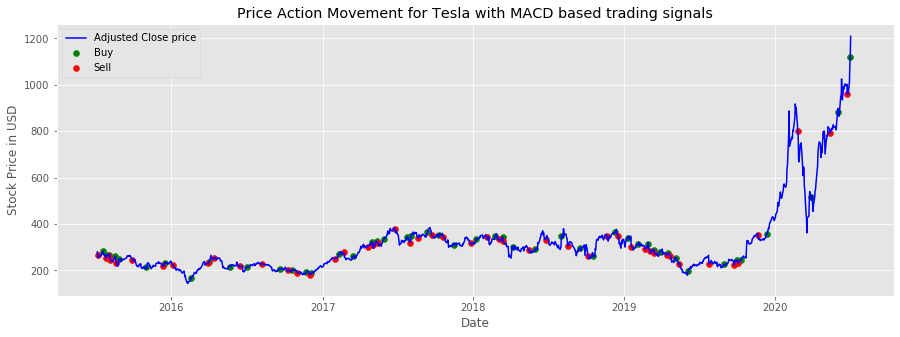

In [26]:
#plotting buy/sell signals on graph
plt.figure(figsize=(15,5))
plt.scatter(df.index,df['Buy_At'],color='green',label='Buy')
plt.scatter(df.index,df['Sell_At'],color='red',label='Sell')
plt.plot(df['Adj Close'],color = 'blue',label = 'Adjusted Close price')
plt.title('Price Action Movement for Tesla with MACD based trading signals')
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()